# A Single Neuron
Learn about linear units, the building blocks of deep learning.

# 🧠 Introduction to Deep Learning with Keras & TensorFlow

Welcome to Kaggle's **Introduction to Deep Learning course!** In this course, I’m learning how to build and train deep neural networks using Python, TensorFlow, and Keras. Along the way, we’ll explore key concepts like linear units, multiple inputs, and how to structure models with Keras. Below, I’ve summarized what we’ve covered in the first tutorial — a great starting point for diving into deep learning!

---

## 📚 What we'll Learn

- ✅ Build fully-connected neural networks
- ✅ Solve regression and classification tasks using deep learning
- ✅ Train models using stochastic gradient descent (SGD)
- ✅ Improve performance using:
  - Dropout
  - Batch normalization
  - Other optimization techniques

---

## 🤖 What is Deep Learning?

Deep Learning is a subfield of Machine Learning that uses **deep stacks of computations** (layers) to model **complex, hierarchical patterns** in data. It powers state-of-the-art applications like:

- Natural Language Translation
- Image Recognition
- Game Playing

Deep Learning models are usually built from **neural networks**, which are composed of simple computing units called **neurons**.

---

## 🔢 The Linear Unit

The **basic building block** of a neural network is the *linear unit*, or neuron.

### Formula:
y = w * x + b

- `x`: Input
- `w`: Weight (learned during training)
- `b`: Bias
- `y`: Output (activation)

This is essentially the **equation of a line**. In a real-world dataset, this neuron could predict something like cereal calories from sugar content.

### Example:
If `w = 2.5`, `b = 90`, and `x = 5` (sugar grams), then:

calories = 2.5 * 5 + 90 = 102.5

## ➕ Multiple Inputs

To use multiple features (e.g., sugars, fiber, protein), we extend the neuron:

### Formula:

y = w0 * x0 + w1 * x1 + w2 * x2 + b

This lets us model more complex relationships (planes or hyperplanes).

---

## 🛠 Linear Unit in Keras

To create a linear model using Keras:

```python
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

  - units=1: Predicting a single output (e.g., calories)

  - input_shape=[3]: Accepts 3 input features (e.g., sugars, fiber, protein)

ℹ️ input_shape is a list to support more complex data (e.g., images use [height, width, channels])





In [1]:
import pandas as pd

red_wine = pd.read_csv('dl-course-data/red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
red_wine.shape

(1599, 12)

# 1) Input shape #

How well can we predict a wine's perceived quality from the physiochemical measurements?  

The target is `'quality'`, and the remaining columns are the features.  How would we set the `input_shape` parameter for a Keras model on this task?
--> input_shape = [11]

input_shape = [11]

# 2) Define a linear model

Now define a linear model appropriate for this task. Pay attention to how many inputs and outputs the model should have.

In [3]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(units=1, input_shape=[11])
])

c:\Users\samad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 3) Look at the weights

Internally, Keras represents the weights of a neural network with **tensors**. Tensors are basically TensorFlow's version of a Numpy array with a few differences that make them better suited to deep learning. One of the most important is that tensors are compatible with [GPU](https://www.kaggle.com/docs/efficient-gpu-usage) and [TPU](https://www.kaggle.com/docs/tpu)) accelerators. TPUs, in fact, are designed specifically for tensor computations.

A model's weights are kept in its `weights` attribute as a list of tensors.

In [4]:
w, b = model.weights
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<Variable path=sequential/dense/kernel, shape=(11, 1), dtype=float32, value=[[-0.03949612]
 [-0.08078319]
 [-0.03218079]
 [-0.0123691 ]
 [-0.25461653]
 [ 0.2882703 ]
 [ 0.60337275]
 [ 0.05004179]
 [-0.2969146 ]
 [-0.12646532]
 [-0.31074113]]>

Bias
<Variable path=sequential/dense/bias, shape=(1,), dtype=float32, value=[0.]>


# Optional: Plot the output of an untrained linear model
 
The kinds of problems we'll work on through Lesson 5 will be *regression* problems, where the goal is to predict some numeric target. Regression problems are like "curve-fitting" problems: we're trying to find a curve that best fits the data. Let's take a look at the "curve" produced by a linear model. (You've probably guessed that it's a line!)
 
We mentioned that before training a model's weights are set randomly.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


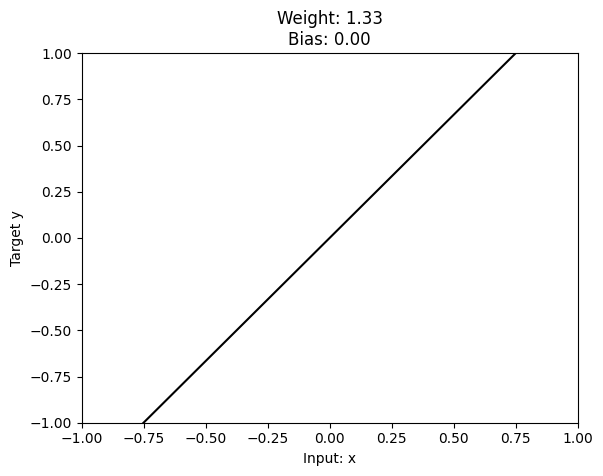

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights 
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()